In [1]:
#Random Forests:

In [37]:
import pandas as pd #librería para datos
import matplotlib.pyplot as plt #para el hist
from scipy import stats as st
import numpy as np

D = pd.read_csv('train.csv')

In [38]:
D['g-r'] = D['gmag'] - D['rmag']
D['u-g'] = D['umag'] - D['gmag']

In [39]:
D.drop(D.columns[[1,2]],axis=1,inplace=True)
D

,ID,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr,g-r,u-g
0,36673,1,20.3002,17.9628,16.8348,16.3556,16.0737,16.0880,15.9560,15.8167,...,16.9856,16.7499,16.5288,16.4654,2.05538,1.71926,1.70257,1.48960,1.1280,2.3374
1,13653,2,19.9693,19.1536,18.8779,18.5348,18.6874,18.4206,18.4970,18.3339,...,18.3253,18.3863,18.1640,17.8504,0.62652,0.58045,0.48900,0.48753,0.2757,0.8157
2,12443,1,19.6725,17.7845,16.8587,16.4569,16.4963,16.1736,16.1445,15.9056,...,16.7947,16.5888,16.4077,16.4764,1.60298,1.34640,1.42361,1.36671,0.9258,1.8880
3,18491,1,18.0130,16.3335,15.5730,15.1977,15.4325,15.1048,14.9082,14.7320,...,16.0594,15.8491,15.6219,15.6869,2.53191,2.25036,2.27722,2.08369,0.7605,1.6795
4,9853,1,19.4998,17.5238,16.5972,16.1700,15.9842,15.7832,15.6724,15.4359,...,16.3796,16.1550,15.9670,16.0522,1.62702,1.37791,1.32720,1.22929,0.9266,1.9760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36509,11992,1,20.4006,18.4808,17.5608,17.1775,16.9184,16.7983,16.6379,16.3651,...,17.1822,16.9643,16.7922,16.7764,1.29516,1.19315,1.21037,1.13880,0.9200,1.9198
36510,2480,1,21.5912,20.6320,19.7599,19.3638,19.1787,19.0183,18.8242,18.5919,...,19.3603,19.1422,18.9172,18.6839,-99.00000,0.96254,1.01963,1.03525,0.8721,0.9592
36511,18689,1,19.1467,17.5102,16.6398,16.2008,16.5664,16.2911,16.0164,15.6173,...,17.2522,16.8747,16.6541,16.6803,2.37643,2.19507,2.20577,2.05849,0.8704,1.6365
36512,8192,1,19.9759,18.1859,17.3268,16.9810,16.6468,16.5435,16.3640,16.1810,...,16.9466,16.7772,16.6043,16.7444,1.23947,1.22703,1.26503,1.11640,0.8591,1.7900


In [19]:
X = D[D.columns.drop(['Hclass','ID'])]; y = D['Hclass']; ID = D['ID']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

qualy = RandomForestClassifier(n_estimators=300,max_depth=10,
                               min_samples_split=10,class_weight='balanced',
                               max_features=None)
#Probamos modificando las cond inic del classifier
#n_estimators=10,max_depth=10,min_samples_split=10,
qualy.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [22]:
y_true, y_predic = y_train, qualy.predict(X_train) #def la posta y lo que me devuelve como ML del test inventado
f1_score(y_true,y_predic,average='weighted')

1.0

In [23]:
y_true, y_predic = y_test, qualy.predict(X_test) #def la posta y lo que me devuelve como ML del test inventado
f1_score(y_true,y_predic,average='weighted')

0.9838891761404173

In [24]:
#Vamos al test
test = pd.read_csv('test.csv')

In [25]:
test['g-r'] = test['gmag'] - test['rmag']
test['u-g'] = test['umag'] - test['gmag']

In [26]:
test.drop(test.columns[[1,2]],axis=1,inplace=True)
test

,ID,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,...,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr,g-r,u-g
0,11281,20.2961,18.4016,17.3666,16.9448,16.8736,16.6726,16.5442,16.3954,16.4295,...,17.3386,17.1178,16.9339,16.9013,1.63602,1.43104,1.26676,1.18375,1.0350,1.8945
1,21564,19.7239,18.5779,17.8981,17.5860,17.6714,17.6123,17.5774,17.3652,17.3354,...,18.7404,18.5963,18.3875,18.2409,2.12984,1.73304,1.70181,1.55373,0.6798,1.1460
2,22373,22.0444,20.5989,18.8971,18.2151,17.8987,17.5921,16.9299,16.6915,16.3482,...,18.0407,17.6386,17.1324,16.8423,1.04050,0.85412,0.91617,0.87085,1.7018,1.4455
3,8068,19.7680,18.1440,17.3126,16.8544,16.6924,16.4934,16.3377,16.0519,16.0796,...,17.4381,17.1336,16.8857,16.8065,2.33576,2.04345,2.02135,1.92818,0.8314,1.6240
4,41641,24.2360,21.8413,20.5830,18.8157,18.1586,17.7068,17.4722,17.5302,17.6818,...,17.6364,17.3740,17.4236,17.5652,0.64069,0.51516,0.60614,0.53723,1.2583,2.3947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167,3011,22.3890,20.5640,19.2006,18.6077,18.3602,18.0631,17.9384,17.6219,17.2827,...,18.3167,18.0439,17.7252,17.4400,-99.00000,0.91602,0.81682,0.80647,1.3634,1.8250
12168,30812,21.7142,20.0542,18.4546,17.8597,17.9355,17.6523,17.3936,17.0835,16.7833,...,18.1366,17.8247,17.5080,17.2316,1.42012,1.11325,1.08542,1.18156,1.5996,1.6600
12169,27174,21.2130,20.4727,20.3292,20.2480,20.0698,19.8097,19.8114,19.6339,19.5352,...,19.6240,19.6526,19.5105,19.4599,0.68798,0.49589,0.47225,0.50385,0.1435,0.7403
12170,28895,24.9123,21.8201,20.1061,19.3034,19.0645,18.8644,18.7376,18.2751,17.9207,...,19.2448,18.9694,18.6093,18.3289,0.78359,0.75514,0.68482,0.67109,1.7140,3.0922


In [27]:
testID = test['ID']; test = test[test.columns.drop('ID')]

In [28]:
test['submit'] = qualy.predict(test)
test

,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,W1mag,...,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr,g-r,u-g,submit
0,20.2961,18.4016,17.3666,16.9448,16.8736,16.6726,16.5442,16.3954,16.4295,17.0730,...,17.1178,16.9339,16.9013,1.63602,1.43104,1.26676,1.18375,1.0350,1.8945,1
1,19.7239,18.5779,17.8981,17.5860,17.6714,17.6123,17.5774,17.3652,17.3354,18.1544,...,18.5963,18.3875,18.2409,2.12984,1.73304,1.70181,1.55373,0.6798,1.1460,1
2,22.0444,20.5989,18.8971,18.2151,17.8987,17.5921,16.9299,16.6915,16.3482,17.0691,...,17.6386,17.1324,16.8423,1.04050,0.85412,0.91617,0.87085,1.7018,1.4455,1
3,19.7680,18.1440,17.3126,16.8544,16.6924,16.4934,16.3377,16.0519,16.0796,16.6949,...,17.1336,16.8857,16.8065,2.33576,2.04345,2.02135,1.92818,0.8314,1.6240,1
4,24.2360,21.8413,20.5830,18.8157,18.1586,17.7068,17.4722,17.5302,17.6818,18.3514,...,17.3740,17.4236,17.5652,0.64069,0.51516,0.60614,0.53723,1.2583,2.3947,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167,22.3890,20.5640,19.2006,18.6077,18.3602,18.0631,17.9384,17.6219,17.2827,17.9290,...,18.0439,17.7252,17.4400,-99.00000,0.91602,0.81682,0.80647,1.3634,1.8250,1
12168,21.7142,20.0542,18.4546,17.8597,17.9355,17.6523,17.3936,17.0835,16.7833,17.3348,...,17.8247,17.5080,17.2316,1.42012,1.11325,1.08542,1.18156,1.5996,1.6600,1
12169,21.2130,20.4727,20.3292,20.2480,20.0698,19.8097,19.8114,19.6339,19.5352,19.4972,...,19.6526,19.5105,19.4599,0.68798,0.49589,0.47225,0.50385,0.1435,0.7403,2
12170,24.9123,21.8201,20.1061,19.3034,19.0645,18.8644,18.7376,18.2751,17.9207,18.2739,...,18.9694,18.6093,18.3289,0.78359,0.75514,0.68482,0.67109,1.7140,3.0922,1


In [29]:
test['ID'] = testID
test

,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,Kmag,W1mag,...,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr,g-r,u-g,submit,ID
0,20.2961,18.4016,17.3666,16.9448,16.8736,16.6726,16.5442,16.3954,16.4295,17.0730,...,16.9339,16.9013,1.63602,1.43104,1.26676,1.18375,1.0350,1.8945,1,11281
1,19.7239,18.5779,17.8981,17.5860,17.6714,17.6123,17.5774,17.3652,17.3354,18.1544,...,18.3875,18.2409,2.12984,1.73304,1.70181,1.55373,0.6798,1.1460,1,21564
2,22.0444,20.5989,18.8971,18.2151,17.8987,17.5921,16.9299,16.6915,16.3482,17.0691,...,17.1324,16.8423,1.04050,0.85412,0.91617,0.87085,1.7018,1.4455,1,22373
3,19.7680,18.1440,17.3126,16.8544,16.6924,16.4934,16.3377,16.0519,16.0796,16.6949,...,16.8857,16.8065,2.33576,2.04345,2.02135,1.92818,0.8314,1.6240,1,8068
4,24.2360,21.8413,20.5830,18.8157,18.1586,17.7068,17.4722,17.5302,17.6818,18.3514,...,17.4236,17.5652,0.64069,0.51516,0.60614,0.53723,1.2583,2.3947,0,41641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12167,22.3890,20.5640,19.2006,18.6077,18.3602,18.0631,17.9384,17.6219,17.2827,17.9290,...,17.7252,17.4400,-99.00000,0.91602,0.81682,0.80647,1.3634,1.8250,1,3011
12168,21.7142,20.0542,18.4546,17.8597,17.9355,17.6523,17.3936,17.0835,16.7833,17.3348,...,17.5080,17.2316,1.42012,1.11325,1.08542,1.18156,1.5996,1.6600,1,30812
12169,21.2130,20.4727,20.3292,20.2480,20.0698,19.8097,19.8114,19.6339,19.5352,19.4972,...,19.5105,19.4599,0.68798,0.49589,0.47225,0.50385,0.1435,0.7403,2,27174
12170,24.9123,21.8201,20.1061,19.3034,19.0645,18.8644,18.7376,18.2751,17.9207,18.2739,...,18.6093,18.3289,0.78359,0.75514,0.68482,0.67109,1.7140,3.0922,1,28895


In [30]:
test[['ID','submit']].to_csv('RF2_OAC.csv',index=False)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
 
%matplotlib inline

In [45]:
from sklearn.cluster import DBSCAN, KMeans, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [46]:
def plot_silouette(silhouette_values, cluster_labels, silhouette_avg, 
                   title="Visualizacion de los datos"):
    fig, ax1 = plt.subplots(1, 1)
    y_lower = 10
    n_clusters = len(np.unique(cluster_labels))
    for i in np.unique(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color   = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(title)
    # ax1.set_xlabel("espacio de la primera caracteristica")
    # ax1.set_ylabel("espacio de la segunda caracteristica")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [47]:
range_n_clusters = [2, 3, 4, 5, 6]
def serch_k_optimus(data_clus, range_n_clusters):
    sse = {}
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        # "Start fitting"
        cluster_labels = clusterer.fit_predict(data_clus)
        # "Stop fitting"
        sse[n_clusters] = clusterer.inertia_

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(data_clus, cluster_labels, random_state=352)
        print("Para n_clusters =", n_clusters,
              "El silhouette_score promedio es :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data_clus, cluster_labels)

        plot_silouette(sample_silhouette_values, cluster_labels,
                       silhouette_avg, title="k={}".format(n_clusters))
    return sse

Para n_clusters = 2 El silhouette_score promedio es : 0.6217573528631494


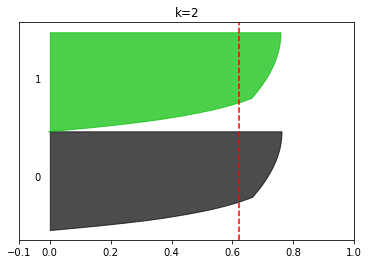

Para n_clusters = 3 El silhouette_score promedio es : 0.62361298833181


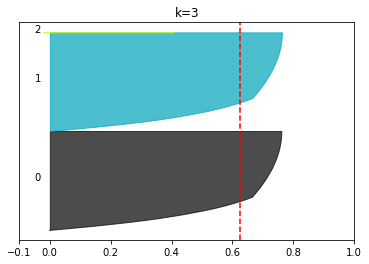

Para n_clusters = 4 El silhouette_score promedio es : 0.5865209128775859


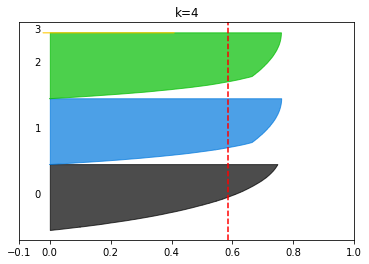

Para n_clusters = 5 El silhouette_score promedio es : 0.5662707288123784


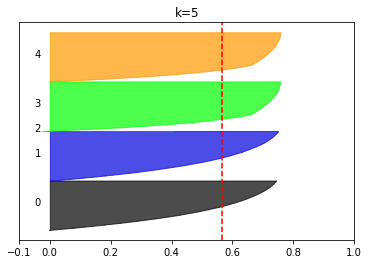

Para n_clusters = 6 El silhouette_score promedio es : 0.5670054829049512


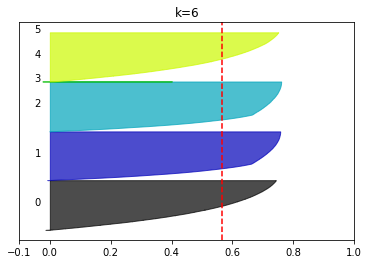

In [48]:
sse = serch_k_optimus(D, range_n_clusters)

In [49]:
D.describe()

,ID,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr,g-r,u-g
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,24326.761297,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,17.656874,...,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251,1.016661,1.422750
std,14038.295072,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,1.553958,...,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817,0.555416,0.862094
min,1.000000,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,10.718900,...,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000,-1.542000,-14.195100
25%,12181.500000,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,16.414525,...,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118,0.598500,0.884300
50%,24300.000000,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,17.722750,...,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180,0.989550,1.378100
75%,36480.750000,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,18.726875,...,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870,1.467300,1.890275
max,48685.000000,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,21.958500,...,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900,15.453400,12.430800


In [52]:
D['Hclass'].count_values()

AttributeError: 'Series' object has no attribute 'count_values'

In [53]:
D['Hclass'].c

0        1
1        2
2        1
3        1
4        1
        ..
36509    1
36510    1
36511    1
36512    1
36513    0
Name: Hclass, Length: 36514, dtype: int64